In [1]:
from modules.validator import Validator
from modules.eda_class_native import run_eda, standardize_runs_df, df_runid_summary #, Validator
from modules.constants_settings import ConstantsSettings as CS
import pandas as pd
from modules.data_import import infer_source_files_technology, read_references_filter,raw_refs_validate

In [2]:

METADATA_DIR = "benchmark_metadata/"
INTERMEDIATE_OUTPUT_DIR= "analysis_data/"
OUTPUT_DIR = "output/"
INPUT_DIR = "benchmark_data/"
technology= CS.TECHNOLOGY_minion # options minion, illumina


In [3]:

all_reports_file, all_parameters_file, all_references_file, validation_file= infer_source_files_technology(technology, INPUT_DIR, METADATA_DIR)
raw_refs= read_references_filter(all_references_file, benchmark_prefix="benchmark_batch")

## validation data
validator = Validator(validation_file, raw_refs)


### summary data
eda_runs = run_eda(validator, all_reports_file, all_parameters_file, 
                   INTERMEDIATE_OUTPUT_DIR)


### pre-processing
eda_runs.split()
eda_runs.combine_data()

full_data = eda_runs.combdat
dataset_success = eda_runs.get_combd_data_success()
sources = eda_runs.sources

combdat_full_process = standardize_runs_df(eda_runs.combdat) ##
run_assess = df_runid_summary(combdat_full_process, INTERMEDIATE_OUTPUT_DIR, technology=technology)


KeyboardInterrupt: 

In [4]:

#####
### generate benchmark tree, calculate scores
from modules.benchmark_graph_utils import pipeline_tree, tree_plot

pipe_tree = pipeline_tree(INTERMEDIATE_OUTPUT_DIR)
pipe_tree.param_input(technology)
pipe_tree.create_pipe_tree()

inter_scores= pipe_tree.calculate_node_scores_with_source_subset_draw(
    eda_runs.softs, run_assess, cv= 100, subset=.7)



node_runs_df (2574, 2)


### Study sorting algorithm

Options for sorting algorithm:
- simple sort: sort by number of reads.

- combined: sort by number of reads and contigs.


In [4]:

all_reports_file, all_parameters_file, all_references_file, validation_file= infer_source_files_technology(technology, INPUT_DIR, METADATA_DIR)

raw_refs= read_references_filter(all_references_file, benchmark_prefix="benchmark_batch")

## validation data
validator = Validator(validation_file, raw_refs)

## raw refs validate
raw_refs= raw_refs_validate(raw_refs, validator)

In [5]:
from modules.pipeline_sort_eda import filter_raw_ref, remap_threshold_stats, clean_df_standardize, plot_sorting_benchmark


sort_type= "combined" # options: simple_counts, combined
node_stats= []

#node_stats= nodes_selected_stat[:10]
#node_stats= list(leaf_paths_index_select)
max_remap= 20
raw_refs_analyse= filter_raw_ref(raw_refs, node_stats)
f1_df, precision_df, recall_df= remap_threshold_stats(raw_refs_analyse, max_remap = max_remap, sort_type= sort_type)
f1_df= clean_df_standardize(f1_df)
precision_df= clean_df_standardize(precision_df)
recall_df= clean_df_standardize(recall_df)


<Figure size 1000x500 with 0 Axes>

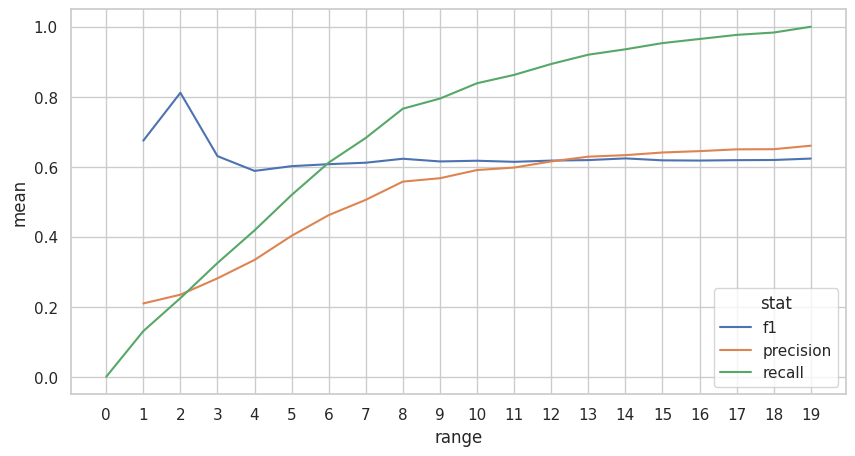

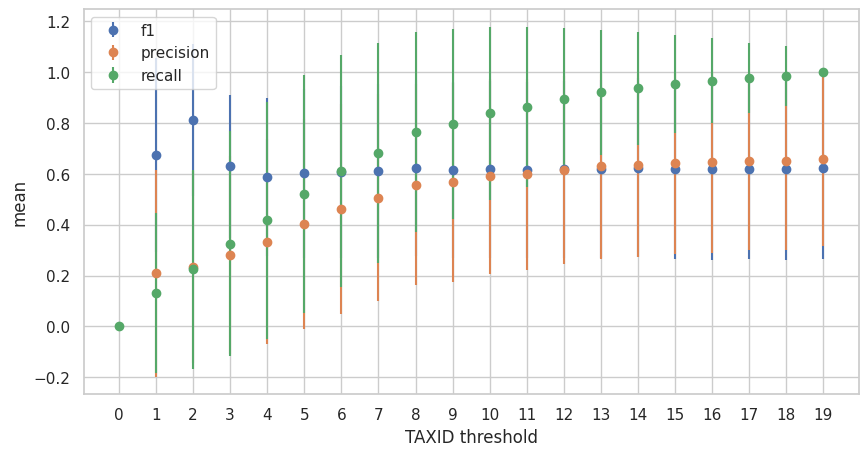

In [7]:
plot_sorting_benchmark(f1_df, precision_df, recall_df, max_remap)